In [1]:
import random
import numpy as np
import pandas as pd

from Node import Node
from Operadores import *
from config import run_exp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seeds = [100, 256, 345, 789, 901, 1234, 2345, 3456, 4567, 5678, 6789, 7890, 8901, 9876, 8765, 7654, 6543, 5432, 4321, 3210, 1111, 2222, 3333, 4444, 5555, 6666, 7777, 8888, 9999, 1]
#Parâmetros gerais
max_depth = 7
train_path = 'datasets\synth1\synth1-train.csv'
test_path = 'datasets\synth1\synth1-test.csv'
n_runs = 30

## Experimentação 1 - Variando p_mutate

In [3]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 100,
"generations": 50,
"mutation_rate": 0.05,
"crossover_rate": 0.6,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['mutation_rate'] = 0.15

parametros_3 = parametros_1.copy()
parametros_3['mutation_rate'] = 0.3

parametros_list = [parametros_1, parametros_2, parametros_3]


In [4]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)
all_stats_3, best_run_3 = run_exp(parametros_3, train_path, test_path, n_runs, seeds)

datasets\synth1\synth1-test.csv
Tamanho da populacao:  99
Generation:  0
Best fitness:  0.7076030770065675
Media fitness:  21416.780371731318
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - (X1 * (4.494753561025281))) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  1
Best fitness:  0.7076030770065675
Media fitness:  1.172902777672453
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - (X1 * (4.494753561025281))) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  2
Best fitness:  0.7076030770065675
Media fitness:  3949791939.933773
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - (X1 * (4.494753561025281))) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao: 

In [5]:
# all_stats: a list of DataFrames returned by run_exp
general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)
general_stats_3 = pd.concat(all_stats_3, ignore_index=True)


#save stats
pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_P_mutate_05.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_P_mutate_15.csv')
pd.DataFrame(general_stats_3).to_csv('Estatisticas\stats_exp_P_mutate_3.csv')

#read
#general_stats_1 = pd.read_csv('Estatisticas\stats_exp_P_mutate_05.csv')
#general_stats_2 = pd.read_csv('Estatisticas\stats_exp_P_mutate_15.csv')
#general_stats_3 = pd.read_csv('Estatisticas\stats_exp_P_mutate_3.csv')

(0.0, 1.5)

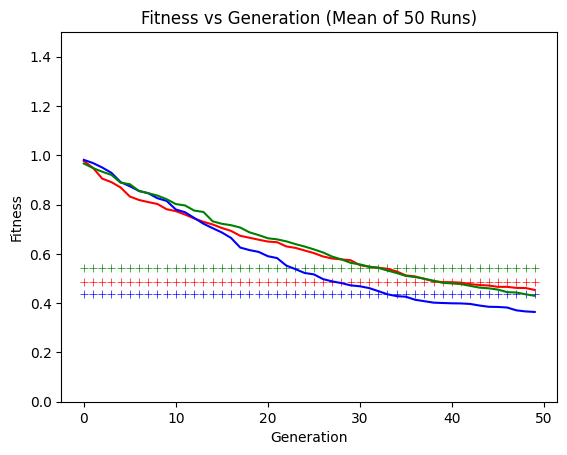

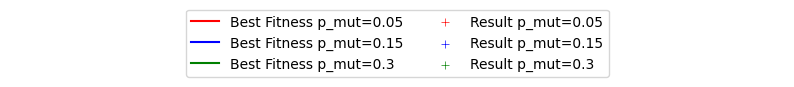

In [6]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()
mean_stats_3 = general_stats_3.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_mut=0.05', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_mut=0.15', color='blue', legend=False)
sns.lineplot(data=mean_stats_3, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_mut=0.3', color='green', legend=False)


# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result p_mut=0.05', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result p_mut=0.15', marker='+', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='test_fitness', ax=ax, label='Result p_mut=0.3', marker='+', color='green', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(mean_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_p_mutate.png', dpi=800, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.5)

## Experimentação 2 - Variando p_cross

In [7]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 100,
"generations": 50,
"mutation_rate": 0.15,
"crossover_rate": 0.9,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['crossover_rate'] = 0.6

parametros_3 = parametros_1.copy()
parametros_3['crossover_rate'] = 0.3



In [8]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)
all_stats_3, best_run_3 = run_exp(parametros_3, train_path, test_path, n_runs, seeds)

datasets\synth1\synth1-test.csv
Tamanho da populacao:  99
Generation:  0
Best fitness:  0.8246599346213977
Media fitness:  5635502318.104167
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * (X1 + X2)))))Tamanho da populacao:  99
Generation:  1
Best fitness:  0.8246599346213977
Media fitness:  2128469098.8522718
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * (X1 + X2)))))Tamanho da populacao:  99
Generation:  2
Best fitness:  0.8246599346213977
Media fitness:  1.1855548437124868
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * (X1 + X2)))))Tamanho da populacao:  99
Generation:  3
Best fitness:  0.8145314398865364
Media fitnes

In [ ]:
# all_stats: a list of DataFrames returned by run_exp
general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)
general_stats_3 = pd.concat(all_stats_3, ignore_index=True)


#save stats
pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_P_cross_9.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_P_cross_6.csv')
pd.DataFrame(general_stats_3).to_csv('Estatisticas\stats_exp_P_cross_3.csv')

(0.0, 1.5)

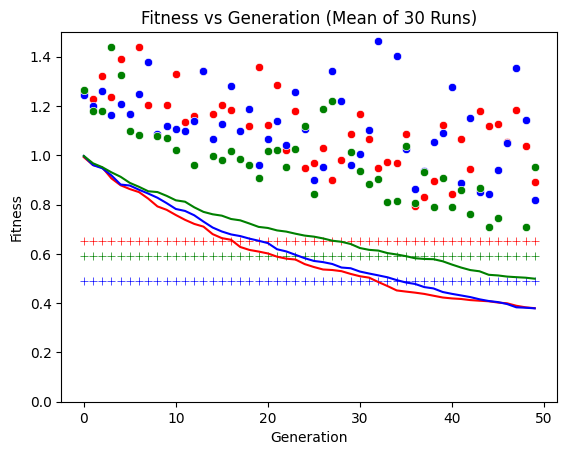

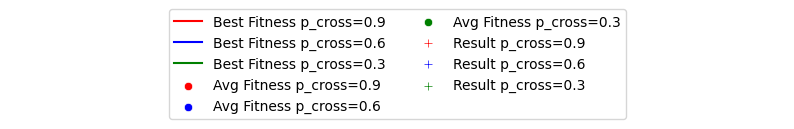

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()
mean_stats_3 = general_stats_3.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_cross=0.9', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_cross=0.6', color='blue', legend=False)
sns.lineplot(data=mean_stats_3, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness p_cross=0.3', color='green', legend=False)

# Plot mean avg_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness p_cross=0.9', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness p_cross=0.6', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness p_cross=0.3', color='green', legend=False)

# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result p_cross=0.9', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result p_cross=0.6', marker='+', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='test_fitness', ax=ax, label='Result p_cross=0.3', marker='+', color='green', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(all_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_p_cross.png', dpi=800, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.5)

# Experimento 3 - Elitismo

In [ ]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 100,
"generations": 50,
"mutation_rate": 0.15,
"crossover_rate": 0.6,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['elitism'] = False

In [ ]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)

datasets\synth1\synth1-test.csv
Tamanho da populacao:  99
Generation:  0
Best fitness:  1.019937641929554
Media fitness:  1.2257817384149698
(sin(ln((0.13374720096563664))) * ((X1 + (-9.794810821558055)) - (X2 - X1)))Tamanho da populacao:  99
Generation:  1
Best fitness:  1.019937641929554
Media fitness:  1.230399203246205
(sin(ln((0.13374720096563664))) * ((X1 + (-9.794810821558055)) - (X2 - X1)))Tamanho da populacao:  99
Generation:  2
Best fitness:  1.019937641929554
Media fitness:  1.177102294546904
(sin(ln((0.13374720096563664))) * ((X1 + (-9.794810821558055)) - (X2 - X1)))Tamanho da populacao:  99
Generation:  3
Best fitness:  1.005415548851913
Media fitness:  1.1723782472332807
((((((((-1.5325286101059898) + (8.317423576006775)) - (X1 - (-1.3204413451577235))) * ln(((2.2471985559514724) - X1))) + ln(ln((X2 - X2)))) + ((ln(((2.559760607503801) * (3.5762246985868735))) - cos(((0.886949423194455) - X2))) - cos(((X1 * (7.821666695574937)) - ((0.8876829186747557) + X2))))) - cos(sin(

In [ ]:
# all_stats: a list of DataFrames returned by run_exp
general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)


#save stats
pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_Elitism_True.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_Elitism_False.csv')

(0.0, 1.5)

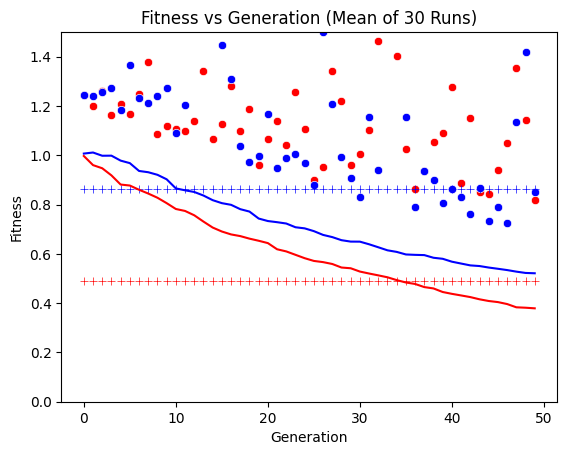

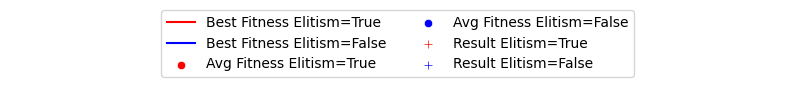

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Elitism=True', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Elitism=False', color='blue', legend=False)

# Plot mean avg_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Elitism=True', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Elitism=False', color='blue', legend=False)

# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result Elitism=True', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result Elitism=False', marker='+', color='blue', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(all_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_elitism.png', dpi=300, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.5)

# Experimento 4 - Tournament Size

In [ ]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 100,
"generations": 50,
"mutation_rate": 0.15,
"crossover_rate": 0.6,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['tournament_size'] = 4

parametros_3 = parametros_1.copy()
parametros_3['tournament_size'] = 8

parametros_4 = parametros_1.copy()
parametros_4['tournament_size'] = 10


In [ ]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)
all_stats_3, best_run_3 = run_exp(parametros_3, train_path, test_path, n_runs, seeds)
all_stats_4, best_run_4 = run_exp(parametros_4, train_path, test_path, n_runs, seeds)

datasets\synth1\synth1-test.csv
Tamanho da populacao:  99
Generation:  0
Best fitness:  0.8247940926832299
Media fitness:  22941.932602774752
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  1
Best fitness:  0.8247940926832299
Media fitness:  6.178816330436806e+22
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((-2.5122399239572024) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  2
Best fitness:  0.8180016074279656
Media fitness:  1.09887879715812
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X2))) + (((cos((X2 * (3.7665198845505117))) - X1) + sin((0.050493992574756064))) + sin(((1) - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  3
Best fitness:  0.8180016074279656
Medi

In [ ]:
# all_stats: a list of DataFrames returned by run_exp
general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)
general_stats_3 = pd.concat(all_stats_3, ignore_index=True)
general_stats_4 = pd.concat(all_stats_4, ignore_index=True)


#save stats
pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_tournament_2.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_tournament_4.csv')
pd.DataFrame(general_stats_3).to_csv('Estatisticas\stats_exp_tournament_8.csv')
pd.DataFrame(general_stats_4).to_csv('Estatisticas\stats_exp_tournament_10.csv')

(0.0, 1.6)

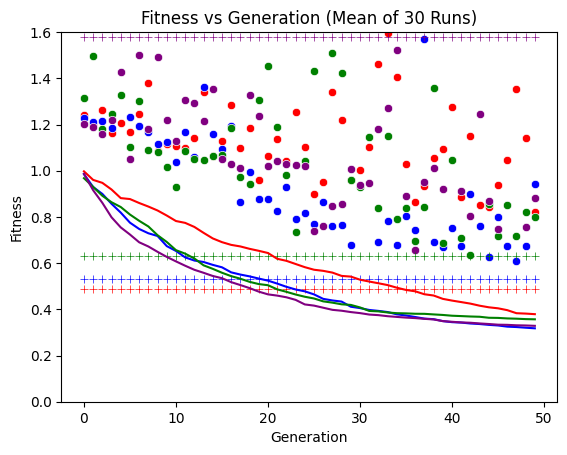

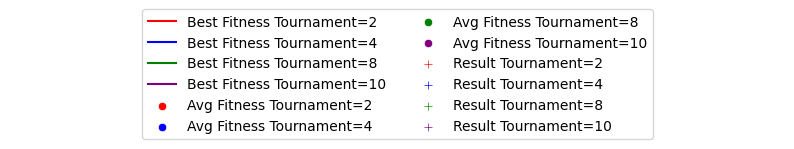

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()
mean_stats_3 = general_stats_3.groupby('generation').mean().reset_index()
mean_stats_4 = general_stats_4.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament=2', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament=4', color='blue', legend=False)
sns.lineplot(data=mean_stats_3, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament=8', color='green', legend=False)
sns.lineplot(data=mean_stats_4, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament=10', color='purple', legend=False)

# Plot mean avg_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament=2', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament=4', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament=8', color='green', legend=False)
sns.scatterplot(data=mean_stats_4, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament=10', color='purple', legend=False)

# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result Tournament=2', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result Tournament=4', marker='+', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='test_fitness', ax=ax, label='Result Tournament=8', marker='+', color='green', legend=False)
sns.scatterplot(data=mean_stats_4, x='generation', y='test_fitness', ax=ax, label='Result Tournament=10', marker='+', color='purple', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(all_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_elitism.png', dpi=300, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.6)

# Experimento 5 - Técnica de Seleção

In [ ]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 100,
"generations": 50,
"mutation_rate": 0.15,
"crossover_rate": 0.6,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['selection_type'] = 'roulette'

parametros_3 = parametros_1.copy()
parametros_3['selection_type'] = 'epsilon_lexicase'


In [ ]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)
all_stats_3, best_run_3 = run_exp(parametros_3, train_path, test_path, n_runs, seeds)

datasets\synth1\synth1-test.csv
Tamanho da populacao:  99
Generation:  0
Best fitness:  0.7790150155479193
Media fitness:  32.01572474627994
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((X2 - X1) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  1
Best fitness:  0.7790150155479193
Media fitness:  6.178816330436806e+22
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((X2 - X1) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  2
Best fitness:  0.7790150155479193
Media fitness:  1.1568406624979186
((((exp(X2) + exp(X1)) + ((X1 * X1) + exp(X1))) + ((((X2 - X1) - X1) + sin((0.050493992574756064))) + sin((X2 - X2)))) - cos(cos((exp((-1.9170488287939875)) * cos(X1)))))Tamanho da populacao:  99
Generation:  3
Best fitness:  0.7790150155479193
Media fitness:  1.126448514781987
((((exp(X2) + exp

In [ ]:
# all_stats: a list of DataFrames returned by run_exp
#general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)
#general_stats_3 = pd.concat(all_stats_3, ignore_index=True)


#save stats
#pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_tournament.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_roulette.csv')
#pd.DataFrame(general_stats_3).to_csv('Estatisticas\stats_exp_epsilon_lexicase.csv')

NameError: name 'all_stats_2' is not defined

In [ ]:
general_stats_1 = pd.read_csv('Estatisticas\stats_exp_tournament.csv')
general_stats_2 = pd.read_csv('Estatisticas\stats_exp_roulette.csv')
general_stats_3 = pd.read_csv('Estatisticas\stats_exp_epsilon_lexicase.csv')

(0.0, 1.6)

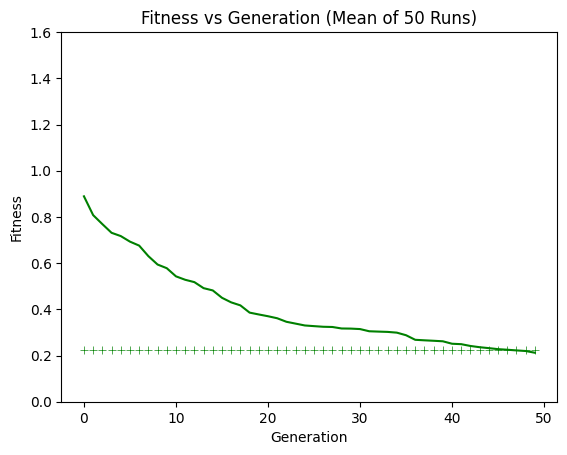

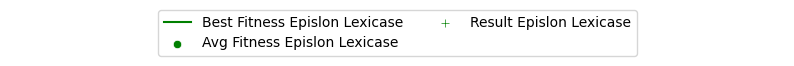

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()
mean_stats_3 = general_stats_3.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Roulette', color='blue', legend=False)
sns.lineplot(data=mean_stats_3, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Epislon Lexicase', color='green', legend=False)

# Plot mean avg_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Roulette', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Epislon Lexicase', color='green', legend=False)

# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result Tournament', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result Roulette', marker='+', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='test_fitness', ax=ax, label='Result Epislon Lexicase', marker='+', color='green', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(all_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_elitism.png', dpi=300, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.6)

# Experimento 6 - Variando Population Size

In [ ]:
# Define your parameters
parametros_1 = {
"elitism": True,
"pop_size": 50,
"generations": 50,
"mutation_rate": 0.15,
"crossover_rate": 0.6,
"selection_type": 'tournament',
"tournament_size": 2,
}

parametros_2 = parametros_1.copy()
parametros_2['pop_size'] = 100

parametros_3 = parametros_1.copy()
parametros_3['pop_size'] = 500


In [ ]:
all_stats_1, best_run_1 = run_exp(parametros_1, train_path, test_path, n_runs, seeds)
all_stats_2, best_run_2 = run_exp(parametros_2, train_path, test_path, n_runs, seeds)
all_stats_3, best_run_3 = run_exp(parametros_3, train_path, test_path, n_runs, seeds)

In [ ]:
# all_stats: a list of DataFrames returned by run_exp
general_stats_1 = pd.concat(all_stats_1, ignore_index=True)
general_stats_2 = pd.concat(all_stats_2, ignore_index=True)
general_stats_3 = pd.concat(all_stats_3, ignore_index=True)


#save stats
pd.DataFrame(general_stats_1).to_csv('Estatisticas\stats_exp_pop_size_50.csv')
pd.DataFrame(general_stats_2).to_csv('Estatisticas\stats_exp_pop_size_100.csv')
pd.DataFrame(general_stats_3).to_csv('Estatisticas\stats_exp_pop_size_500.csv')

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean grouped by generation
mean_stats_1 = general_stats_1.groupby('generation').mean().reset_index()
mean_stats_2 = general_stats_2.groupby('generation').mean().reset_index()
mean_stats_3 = general_stats_3.groupby('generation').mean().reset_index()

# Plot the scatterplots
fig, ax = plt.subplots()

# Plot mean best_fitness vs generation
sns.lineplot(data=mean_stats_1, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Tournament', color='red', legend=False)
sns.lineplot(data=mean_stats_2, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Roulette', color='blue', legend=False)
sns.lineplot(data=mean_stats_3, x='generation', y='best_fitness', ax=ax, errorbar='sd', label='Best Fitness Epislon Lexicase', color='green', legend=False)

# Plot mean avg_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Tournament', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Roulette', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='avg_fitness', ax=ax, label='Avg Fitness Epislon Lexicase', color='green', legend=False)

# Plot mean test_fitness vs generation
sns.scatterplot(data=mean_stats_1, x='generation', y='test_fitness', ax=ax, label='Result Tournament', marker='+', color='red', legend=False)
sns.scatterplot(data=mean_stats_2, x='generation', y='test_fitness', ax=ax, label='Result Roulette', marker='+', color='blue', legend=False)
sns.scatterplot(data=mean_stats_3, x='generation', y='test_fitness', ax=ax, label='Result Epislon Lexicase', marker='+', color='green', legend=False)

# Customize the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.set_title('Fitness vs Generation (Mean of {} Runs)'.format(len(all_stats_1)))

# Remove legend from the main plot if it exists
if ax.get_legend():
    ax.get_legend().remove()

# Save the legend as an image
fig_legend, ax_legend = plt.subplots(figsize=(10, 0.5))
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10, ncol=2)
ax_legend.axis('off')
fig_legend.savefig('Assets/legend_exp_elitism.png', dpi=300, bbox_inches='tight')

# Set the y-axis limit
ax.set_ylim(0, 1.6)